# Clustering hands-on
Goal of this excercise is to complete the hands-on experience task with similar task description as in the clustering project case.

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

# Data loading

In [2]:
df = pd.read_csv('country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


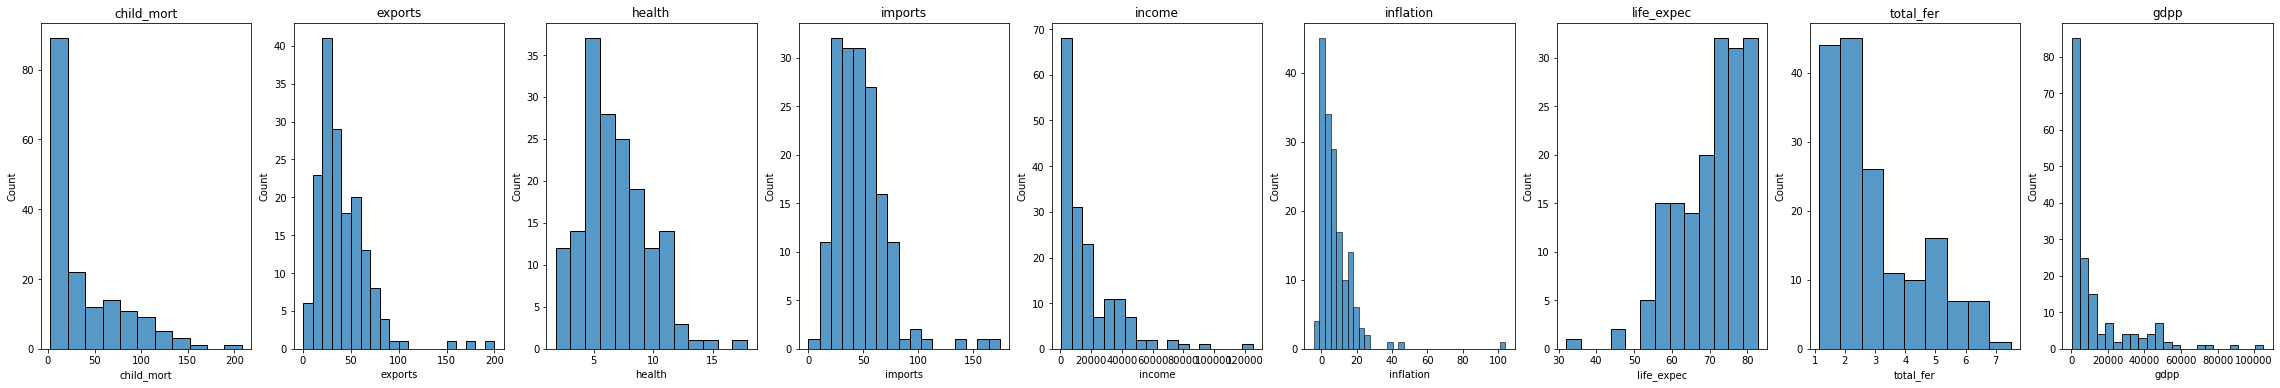

In [5]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

## Is it wise to scale the data?
- How would it help us?
- What different options do we have?
minmax 0-1, powerscale? powertransform

## Use k-means or agglomerative clustering algorithm to cluster the data
- How many clusters did you choose? Why? použit kmeans, určit počet shluku, elbow. agglo dendrogram. přidat labely do původního datasetu.
shluky 3-4

## Perform an exploration analysis of the clustered data
- Write down your conlusions about differences/similarities about the feature characteristics according to the individial clusters

## Write down a conlustion about clusters as a whole, i.e. try to characterize the data in them in a few sentences
- Cluster 1 - ...
- Cluster 2 - ...
- ...
- Cluster N - ...

# Task (2p)
- Finished the proposed tasks

**Write down conclusion to the Markdown cell**

# Data preprocessing
- Why do we need to preprocess the data?

In [6]:
X = df_only_numeric.values

In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [8]:
df.select_dtypes(np.number).columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
df_scaled = pd.DataFrame(X_min_max_scaled, columns=df_only_numeric.columns)

In [10]:
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


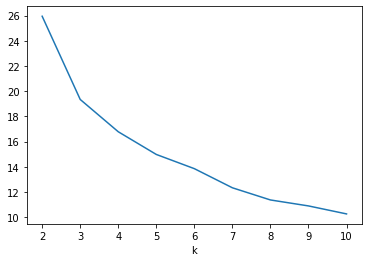

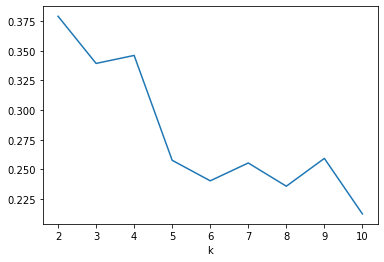

In [11]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(df_scaled)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(df_scaled, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

Počet clusterů určeny na 3

In [12]:
clustering = sklearn.cluster.KMeans(n_clusters=3,random_state=13)
clustering.fit(df_scaled)

KMeans(n_clusters=3, random_state=13)

In [13]:
pd.Series(clustering.labels_).value_counts()

1    86
0    46
2    35
dtype: int64

In [14]:
df['cluster_id'] = clustering.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


Přidání cluster id do záznamu

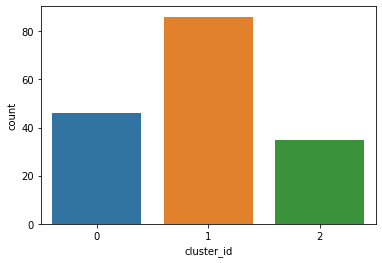

In [15]:
sns.countplot(data=df, x='cluster_id')

Množství dat v jednotlivých clusterech

In [22]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe())

child_mort                                                      \
                count       mean        std   min     25%    50%      75%   
cluster_id                                                                  
0                46.0  93.284783  34.079410  28.1  64.625  90.25  111.000   
1                86.0  22.425581  14.459934   4.5  11.550  18.35   29.175   
2                35.0   4.897143   2.130795   2.6   3.500   4.20    5.400   

                  exports                                                     \
              max   count       mean        std     min     25%   50%    75%   
cluster_id                                                                     
0           208.0    46.0  29.287174  18.479530   2.200  16.875  23.8  38.80   
1            64.4    86.0  40.382430  19.089329   0.109  26.900  37.3  51.40   
2            10.8    35.0  58.431429  42.501749  12.400  29.500  50.2  67.05   

                  health                                                   \
              max  count      mean       std   min     25%   50%      75%   
cluster_id                                                                  
0            85.8   46.0  6.338478  2.668183  2.20  4.5150  5.48   7.8450   
1            93.8   86.0  6.215581  2.163140  1.97  4.8725  5.93   7.4275   
2           200.0   35.0  8.917429  3.154562  1.81  7.8250  9.48  10.8500   

                 imports                                                \
             max   count       mean        std      min     25%    50%   
cluster_id                                                               
0           13.1    46.0  43.297826  18.636362  17.2000  30.225  41.50   
1           14.2    86.0  46.932162  19.647602   0.0659  31.650  48.65   
2           17.9    35.0  51.508571  37.381754  13.6000  28.300  37.40   

                          income                                       \
               75%    max  count          mean           std      min   
cluster_id                                                              
0           49.525  101.0   46.0   3516.804348   5391.402727    609.0   
1           60.025  108.0   86.0  12770.813953   8578.103618   1990.0   
2           62.900  174.0   35.0  45802.857143  21141.490928  25200.0   

                                                inflation             \
                25%      50%      75%       max     count       mean   
cluster_id                                                             
0            1390.0   1835.0   3310.0   33700.0      46.0  12.097065   
1            6715.0  10700.0  16950.0   45400.0      86.0   7.609023   
2           32400.0  40400.0  47550.0  125000.0      35.0   2.535000   

                                                            life_expec  \
                  std    min     25%    50%      75%    max      count   
cluster_id                                                               
0           15.670791  0.885  3.9400  8.995  16.6000  104.0       46.0   
1            7.758666 -4.210  2.4325  5.935   9.9525   45.9       86.0   
2            4.053256 -3.220  0.4180  1.160   3.4200   16.7       35.0   

                                                                   total_fer  \
                 mean       std   min     25%    50%     75%   max     count   
cluster_id                                                                     
0           59.393478  6.473859  32.1  56.925  60.25  62.875  71.1      46.0   
1           72.582558  4.568156  54.3  70.000  73.60  76.075  80.4      86.0   
2           80.245714  1.696596  75.5  79.650  80.40  81.400  82.8      35.0   

                                                                   gdpp  \
                mean       std   min     25%    50%     75%   max count   
cluster_id                                                                
0           5.090217  0.940327  3.15  4.5700  5.085  5.6725  7.49  46.0   
1           2.293256  0.659719  1.25  1.7625  2.235  2.6575  

Pojmenování clusterů: 
- 0 nejchudší rozvojové země
- 1 vyspělé země
- 2 nejvyspělejší země

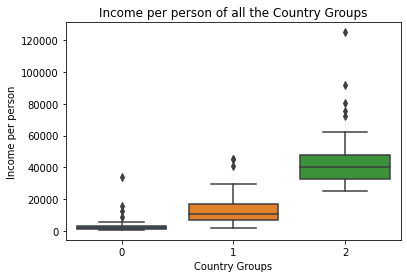

In [36]:
sns.boxplot(data=df, y='income', x='cluster_id')
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all the Country Groups')
plt.show()

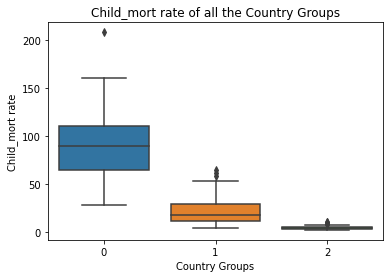

In [34]:
sns.boxplot(data=df,x='cluster_id',y='child_mort')
plt.xlabel('Country Groups')
plt.ylabel('Child_mort rate')
plt.title('Child_mort rate of all the Country Groups')
plt.show()

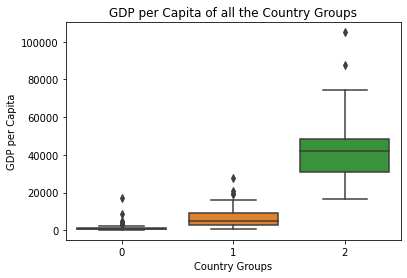

In [35]:
sns.boxplot(data=df,x='cluster_id',y='gdpp')
plt.xlabel('Country Groups')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita of all the Country Groups')
plt.show()

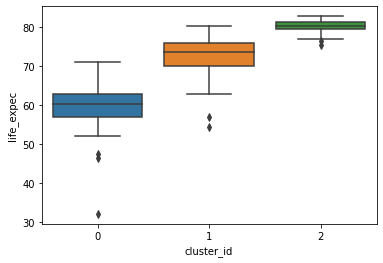

In [38]:
sns.boxplot(data=df,x='cluster_id',y='life_expec')


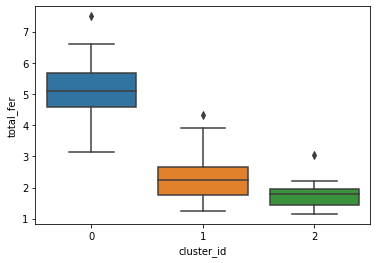

In [41]:
sns.boxplot(data=df,x='cluster_id',y='total_fer')

Datasety podle clusteru

In [42]:
poor=df[df['cluster_id']==0]
Avg=df[df['cluster_id']==1]
best=df[df['cluster_id']==2]

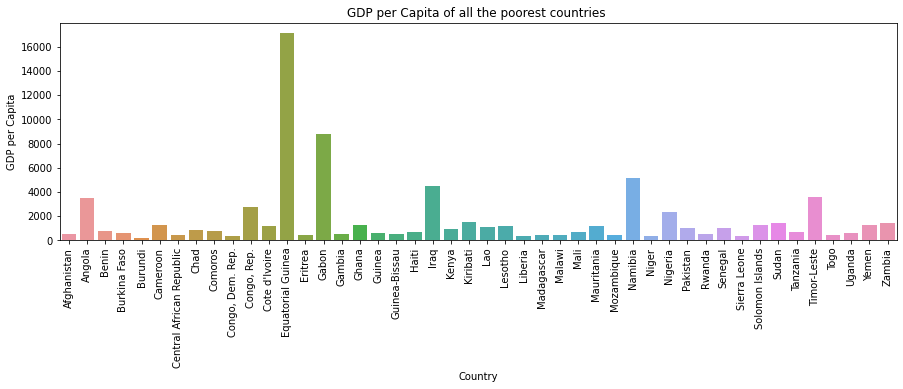

In [44]:
fig = plt.figure(figsize = (15,4))
s=sns.barplot(x='country',y='gdpp',data=poor)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita of all the poorest countries ')
plt.show()

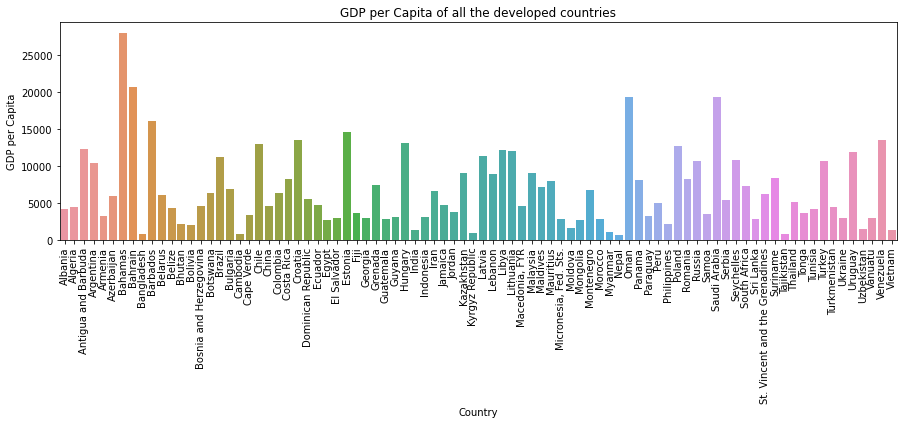

In [45]:
fig = plt.figure(figsize = (15,4))
s=sns.barplot(x='country',y='gdpp',data=Avg)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita of all the developed countries')
plt.show()

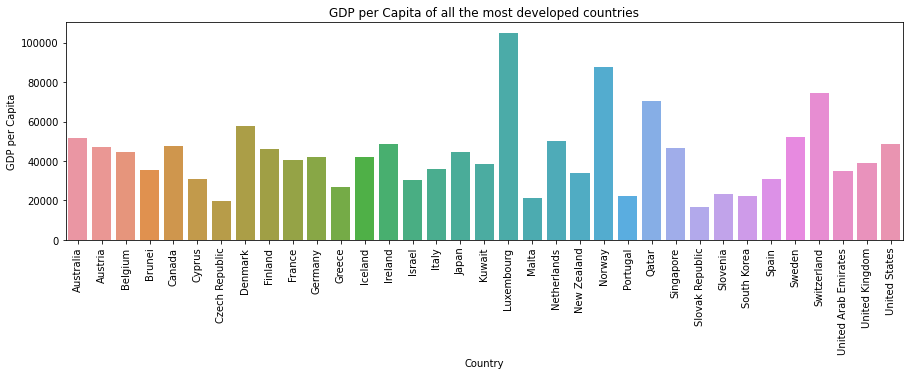

In [46]:
fig = plt.figure(figsize = (15,4))
s=sns.barplot(x='country',y='gdpp',data=best)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita of all the most developed countries')
plt.show()

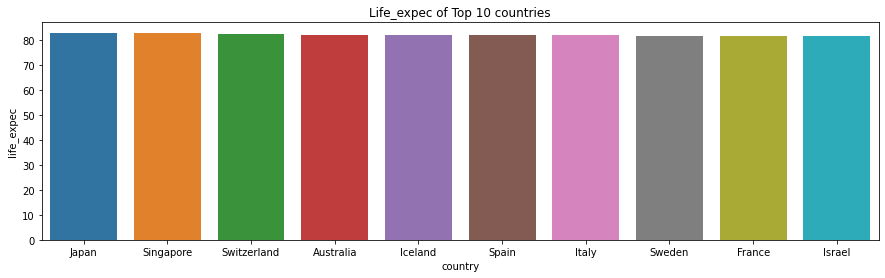

In [60]:
most_life = df.nlargest(10,'life_expec')
fig = plt.figure(figsize = (15,4))
sns.barplot(data= most_life,x='country',y='life_expec')
plt.title('Life_expec of Top 10 countries')
plt.ylabel('life_expec')
plt.show()

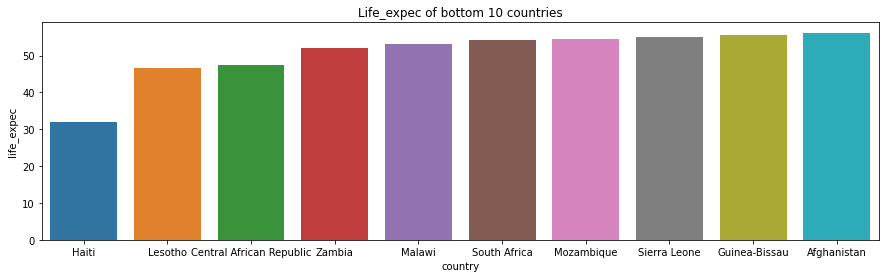

In [63]:
least_life = df.nsmallest(10,'life_expec')
fig = plt.figure(figsize = (15,4))
sns.barplot(data= least_life,x='country',y='life_expec')
plt.title('Life_expec of bottom 10 countries')
plt.ylabel('life_expec')
plt.show()

In [49]:
most_mort = df.nlargest(10,'child_mort')

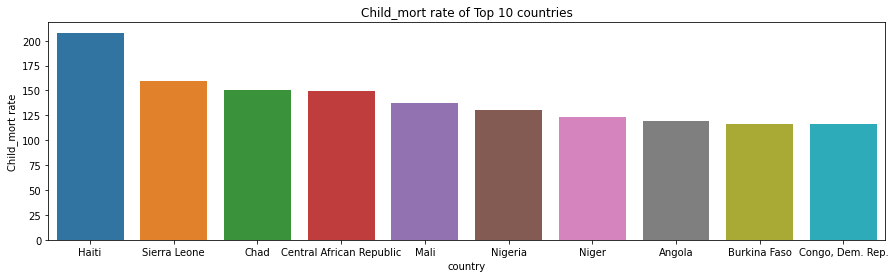

In [50]:
fig = plt.figure(figsize = (15,4))
sns.barplot(data= most_mort,x='country',y='child_mort')
plt.title('Child_mort rate of Top 10 countries')
plt.ylabel('Child_mort rate')
plt.show()

In [52]:
most_fert = df.nlargest(10,'total_fer')

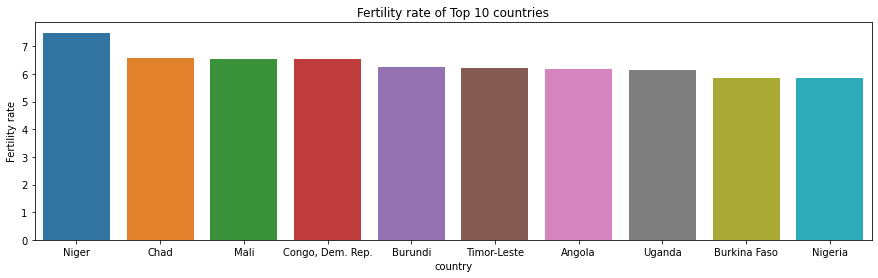

In [54]:
fig = plt.figure(figsize = (15,4))
sns.barplot(data= most_fert,x='country',y='total_fer')
plt.title('Fertility rate of Top 10 countries')
plt.ylabel('Fertility rate')
plt.show()

Jak můžeme vidět v obou grafech jsou téměř totožné země, protože vysoká smrtnost dětí souvisí s vysokou plodnosti, jak můžeme vidět i níže v korelační matici.

In [57]:
corr_mat = df_only_numeric.corr()

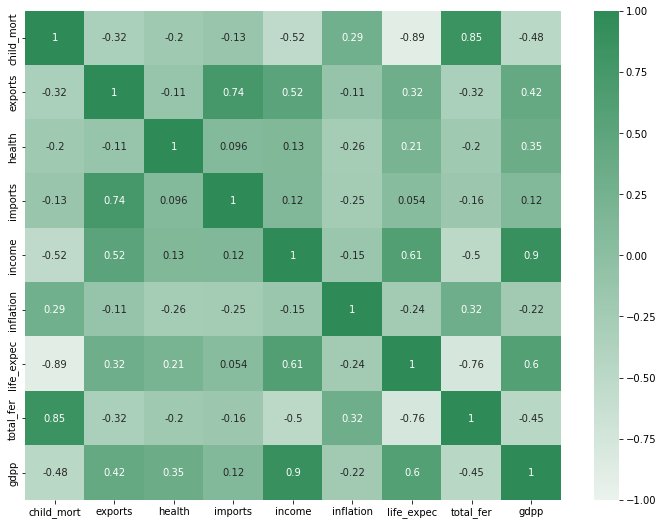

In [59]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, vmin = -1, vmax = 1, cmap=sns.light_palette('seagreen',as_cmap=True), annot= True)